# EDA

#### 1. 데이터 형식 확인 

In [1]:
import pandas as pd
import numpy as np

In [51]:
df = pd.read_excel('C:/Users/jlee0/Desktop/KYU/hanim ict/1/data/주가예측 데이터.xlsx')

In [52]:
df

,Unnamed: 0,B,C,D,E,F,G,H,I,J,...,2019_03,2019_04,2019_05,2019_06,2019_07,2019_08,2019_09,2019_10,2019_11,2019_12
0,0.000000,A005930,삼성전자,반도체 관련장비 및 부품,종합 반도체,코스피,2566000,3312667.36,-1.50,2.598960,...,0,0,0,0,0,0,0,0,0,0
1,1.000000,A000660,SK하이닉스,반도체 관련장비 및 부품,종합 반도체,코스피,76800,559105.82,-1.29,-0.903226,...,0,0,0,0,0,0,0,0,0,0
2,2.000000,A005380,현대차,자동차 및 관련부품,완성차,코스피,151500,333718.87,1.00,-6.481481,...,0,0,0,0,0,0,0,0,0,0
3,3.000000,A005490,POSCO,철강 및 비철강,제철,코스피,334500,291639.96,0.75,0.450450,...,0,0,0,0,0,0,0,0,0,0
4,4.000000,A035420,NAVER,IT서비스,인터넷서비스,코스피,841000,277216.13,1.57,1.815981,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69403,69474.999951,A226440,한송네오텍,디스플레이 장비 및 부품,디스플레이 부품,코스닥,1290,511.00,0.00,4.900000,...,0,0,0,0,0,0,0,0,0,1
69404,69475.999951,A218150,미래생명자원,식음료,식료품,코스닥,2935,548.00,0.20,-0.500000,...,0,0,0,0,0,0,0,0,0,1
69405,69476.999951,A225440,0,0,0,0,0,0.00,0.00,0.000000,...,0,0,0,0,0,0,0,0,0,1
69406,69477.999951,A232330,0,0,0,0,0,0.00,0.00,0.000000,...,0,0,0,0,0,0,0,0,0,1


36개월 동안 1928개의 기업이 44개의 피쳐를 갖고 있다는 점에서 올바른 양식을 띄고 있다는 걸 확인할 수 있다.

In [29]:
# 파산 기업 비율 확인 

a = df['C'] == 0
bankrupt_ratio = a.sum() / 69408 * 100

print("파산 기업 비율 : ",bankrupt_ratio,"%")

파산 기업 비율 :  1.5387275242047027 %


### 2. 결측치 확인

In [3]:
import missingno as msno

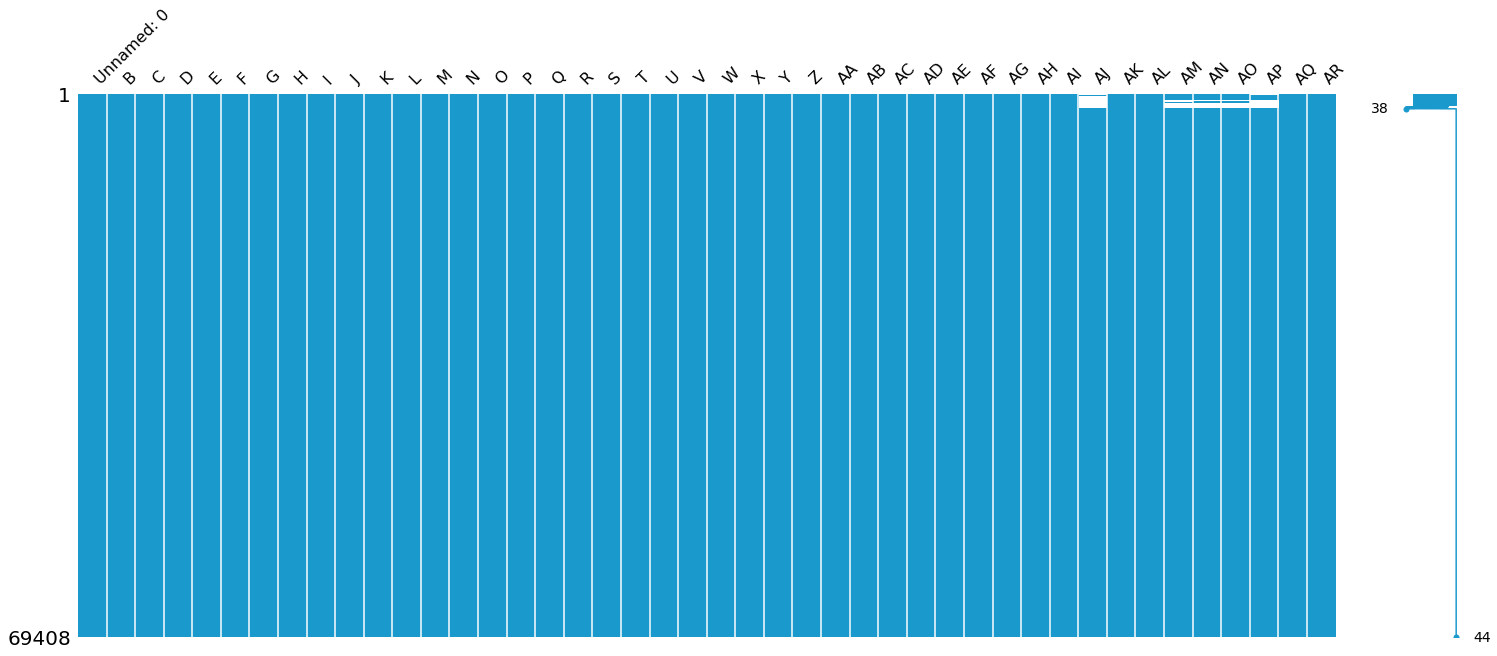

In [4]:
msno.matrix(df=df.iloc[:,0:44], color=(0.1, 0.6, 0.8))

2017.01 데이터 이외에는 NAN값이 모두 0으로 처리되었다. 

즉, AJ, AM, AN, AO, AP은 실질적으로 결측값이 매우 많다고 생각할 수 있다.

실제 결측치이지만 0값으로 표현된 경우도 많다. 

보통 어떤 지표에 0이 존재하지 않는다는 가정하에 0값도 NaN값으로 바꾸어주겠다. 

In [5]:
df_copy = df
df_copy = df_copy.replace(0,np.NaN)

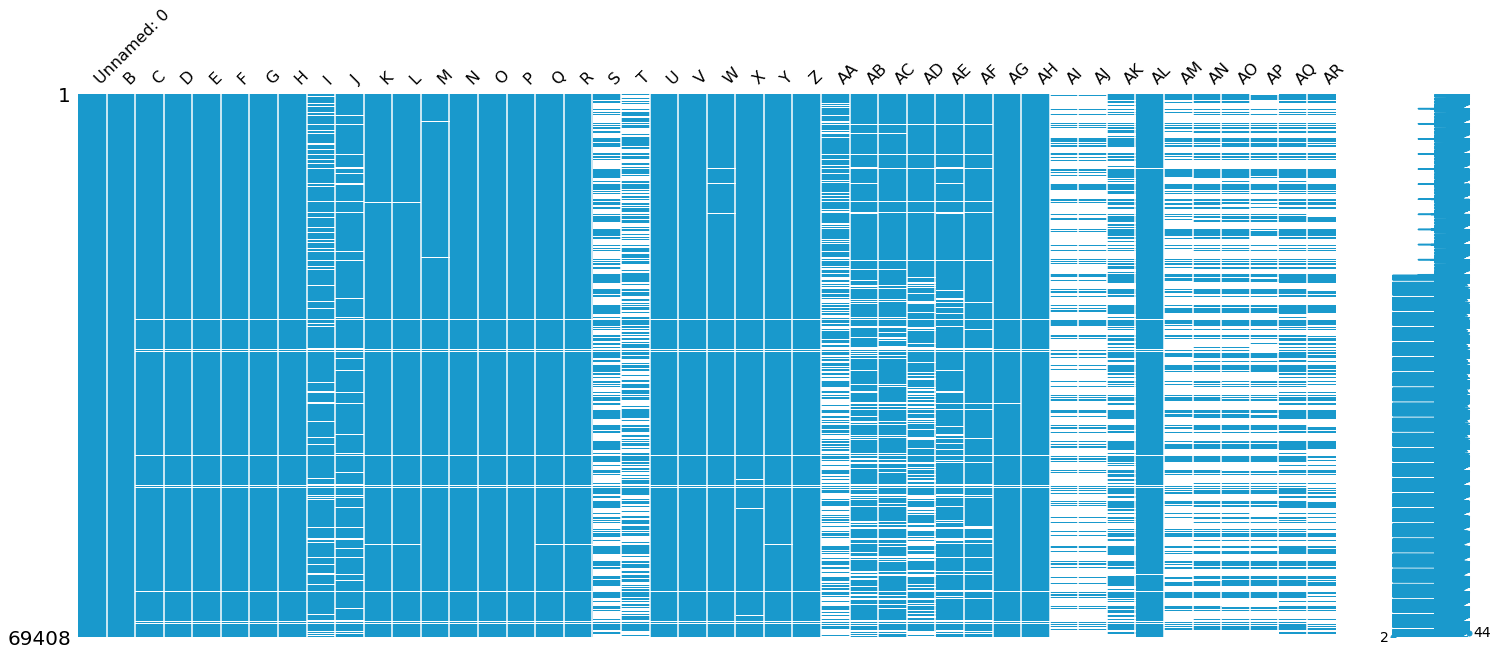

In [6]:
msno.matrix(df=df_copy.iloc[:,0:44], color=(0.1, 0.6, 0.8))


결측값으로 처리된 컬럼들

- I : 1일 등락률(%)

- J : 5일 등락률(%)

- K : 과거 ROE(%)

- L : 과거 ROA(%)

- M : 과거 PCR

- S : 1년후 PER

- T : 시가 배당률(%)

- W : 매출액(억)

- AA : 당일 기관(%)

- AB : 당일 외인(%)

- AC : 당일 수급(%)

- AD : 주간 기관(%)

- AE : 주간 외인(%)

- AF : 주간 수급(%)

- AG : 고점 대비 PBR 괴리율

- AH : 저점 대비 PBR 괴리율

- AI : 목표가 괴리율 (%)

- AJ : 목표 주가

- AK : 마지막 리포트일

- AL : 실적 발표일
 
- AM : 1주일 어닝스

- AN : 1달 어닝스

- AO : 3개월 어닝스

- AP : 6개월 어닝스

- AQ : 12개월 어닝스

- AR : 어닝스 점수

n기간 어닝스 : 1년후 지배순익 - n기간 전 1년후 지배순익. 최근 1주일내 애널리스트들이 지배주주순이익을 상향조정했거나 지배주주순이익 자체가 올라간 경우 적용.

목표주가, 어닝스 자체가 애널리스트들의 예측

In [7]:
nan_cols = ['I', 'J', 'K', 'L','M','S','T','W','AA','AB','AC','AD','AE','AF','AG','AH','AI','AJ','AK','AL','AM','AN','AO','AP','AQ','AR']
for i in nan_cols:
    a = int(df_copy[i].isnull().sum() / 69408 * 100)
    print(i,'have',a,'% null data')

I have 10 % null data
J have 6 % null data
K have 2 % null data
L have 2 % null data
M have 1 % null data
S have 55 % null data
T have 46 % null data
W have 2 % null data
AA have 42 % null data
AB have 17 % null data
AC have 13 % null data
AD have 24 % null data
AE have 10 % null data
AF have 6 % null data
AG have 1 % null data
AH have 1 % null data
AI have 79 % null data
AJ have 79 % null data
AK have 49 % null data
AL have 1 % null data
AM have 69 % null data
AN have 64 % null data
AO have 63 % null data
AP have 64 % null data
AQ have 55 % null data
AR have 59 % null data


결측 40% 이상인 것 : 

- S : 1년후 PER, 1년후 예상 PER 지표이다. 애널리스트들의 예측을 기반으로 한다. PER와 관련된 Q,R 지표가 있기 때문에 삭제해도 무방함.

- T : 시가 배당률(%), 시가배당금 / 주가. 높을수록 주주들이 선호하며 주가가 안정적으로 갈 가능성이 높음. 이익을 주주와 나누는 것, 버리기 상당히 아까운 지표이다. 결측치 채울 방안을 생각해보자

- AA : 당일 기관(%), 당일 기관 수급 ,기관순매수대금 / 시가총액. 높을수록 기관의 매수세가 강하다고 생각. 이 부분은 실제로 기관 수급이 없었을 수도 있기 때문에 0을 Null로 처리하지 않는게 옳다. 컬럼 사용 가능

-  AI : 목표가 괴리율(%) : (현재가 * 100) / 목표주가. 괴리율리 낮을수록 현재가 < 목표주가를 의미. 너무 많은 Null 데이터를 보유한다. 삭제

-  AJ : 목표주가 : 애널리스트들이 측정한 목표주가의 평균 (가중평균치 사용, 과거 7 당일 3). 너무 많은 Null 데이터를 보유한다. 삭제

-  AK : 마지막 리포트일 : 기업재무관련 지표가 아니다. 삭제. 

- AL : 실적 발표일 : 기업재무관련 지표가 아니다. 삭제

- AM, AN, AO, AP, AQ : 어닝스 관련 지표. 어닝스 점수인 AR 컬럼으로 대체하겠다.

- AR : 어닝스 점수, 1주일 어닝스 1%이상 20점, 1개월 어닝스 1% 이상 20점, 3개월 어닝스 3%이상 20점, 6개월 어닝스 6%이상 20점, 9개월 어닝스 9%이상 20점, 12개월 어닝스 12%이상 20점 으로 총 120점 만점. 미디언으로 결측을 채워 사용하겠다. (or 0으로 결측 채워)


삭제 컬럼 : S, AI, AJ, AK, AL, AM ,AN, AO, AP, AQ

결측 채울 컬럼 : T, AR

결측을 0으로 대체하여 사용 할 컬럼 : AA

In [8]:
df.drop(['S','AI','AJ','AK','AL','AM','AN','AO','AP','AQ'],axis = 1, inplace = True)

#### T, AR 결측값 채우기

결측 비율이 높다는 점에서 회귀분석 모델을 사용하여 결측을 채우겠다.

사용할 회귀 분석 모델 : KNN, W-KNN, SVM 

In [132]:
bis = []


bis_index = df[df.B == 'A078160'].index
for i in bis_index:
    bis.append(df.loc[i])
bis = pd.DataFrame(bis)
bis_copy = bis['K']
bis_copy.replace(0,'nan', inplace = True)
bis_copy.interpolate()

244      nan
2172     nan
4100     nan
6028     nan
7956     nan
9884     nan
11812    nan
13740    nan
15668    nan
17596    nan
19524    nan
21452    nan
23380   -3.6
25308   -3.6
27236   -3.6
29164   -3.6
31092   -3.6
33020   -3.6
34948   -3.6
36876   -3.6
38804   -3.6
40732   -3.6
42660   -3.6
44588   -3.6
46516    2.2
48444    2.2
50372    2.2
52300    2.2
54228    2.2
56156    2.2
58084    2.2
60012    2.2
61940    2.2
63868    2.2
65796    2.2
67724    2.2
Name: K, dtype: object

In [127]:
bis_copy

244      0.0
2172     0.0
4100     0.0
6028     0.0
7956     0.0
9884     0.0
11812    0.0
13740    0.0
15668    0.0
17596    0.0
19524    0.0
21452    0.0
23380   -3.6
25308   -3.6
27236   -3.6
29164   -3.6
31092   -3.6
33020   -3.6
34948   -3.6
36876   -3.6
38804   -3.6
40732   -3.6
42660   -3.6
44588   -3.6
46516    2.2
48444    2.2
50372    2.2
52300    2.2
54228    2.2
56156    2.2
58084    2.2
60012    2.2
61940    2.2
63868    2.2
65796    2.2
67724    2.2
Name: K, dtype: float64

In [74]:
# K,L,M,W,AG,AH 보간을 통해 결측치 채우기
# I,J,AB,AC,AD,AE,AF는 0이 존재할 수 있기 때문에 그대로 가져감.

bis = []

for i in range(69408):
    if df['B'].items() == 'A005930':
        bis.append(df[i])

In [92]:
bis_index = df[df.B == 'A005930'].index

In [93]:
bis_index 

Int64Index([    0,  1928,  3856,  5784,  7712,  9640, 11568, 13496, 15424,
            17352, 19280, 21208, 23136, 25064, 26992, 28920, 30848, 32776,
            34704, 36632, 38560, 40488, 42416, 44344, 46272, 48200, 50128,
            52056, 53984, 55912, 57840, 59768, 61696, 63624, 65552, 67480],
           dtype='int64')

In [100]:
bis = []

for i in bis_index:
    bis.append(df.loc[i])
    bis = pd.DataFrame(bis)
    bis_copy = bis['K','L','M','W','AG','AH']
    bis_copy.interpolate()
    

In [103]:
bis

[Unnamed: 0                0
 B                   A005930
 C                      삼성전자
 D             반도체 관련장비 및 부품
 E                    종합 반도체
                   ...      
 2019_08                   0
 2019_09                   0
 2019_10                   0
 2019_11                   0
 2019_12                   0
 Name: 0, Length: 80, dtype: object,
 Unnamed: 0             2000
 B                   A005930
 C                      삼성전자
 D             반도체 관련장비 및 부품
 E                    종합 반도체
                   ...      
 2019_08                   0
 2019_09                   0
 2019_10                   0
 2019_11                   0
 2019_12                   0
 Name: 1928, Length: 80, dtype: object,
 Unnamed: 0             3928
 B                   A005930
 C                      삼성전자
 D             반도체 관련장비 및 부품
 E                    종합 반도체
                   ...      
 2019_08                   0
 2019_09                   0
 2019_10                   0
 2019_11                

In [106]:
bis

,Unnamed: 0,B,C,D,E,F,G,H,I,J,...,2019_03,2019_04,2019_05,2019_06,2019_07,2019_08,2019_09,2019_10,2019_11,2019_12
0,0.000000,A005930,삼성전자,반도체 관련장비 및 부품,종합 반도체,코스피,2566000,3312667.36,-1.5,2.59896,...,0,0,0,0,0,0,0,0,0,0
1928,2000.000000,A005930,삼성전자,반도체 관련장비 및 부품,종합 반도체,코스피,2566000,3312667.36,-1.5,2.59896,...,0,0,0,0,0,0,0,0,0,0
3856,3928.000000,A005930,삼성전자,반도체 관련장비 및 부품,종합 반도체,코스피,2566000,3312667.36,-1.5,2.59896,...,0,0,0,0,0,0,0,0,0,0
5784,5856.000000,A005930,삼성전자,반도체 관련장비 및 부품,종합 반도체,코스피,2566000,3312667.36,-1.5,2.59896,...,0,0,0,0,0,0,0,0,0,0
7712,7784.000000,A005930,삼성전자,반도체 관련장비 및 부품,종합 반도체,코스피,2566000,3312667.36,-1.5,2.59896,...,0,0,0,0,0,0,0,0,0,0
9640,9712.000000,A005930,삼성전자,반도체 관련장비 및 부품,종합 반도체,코스피,2566000,3312667.36,-1.5,2.59896,...,0,0,0,0,0,0,0,0,0,0
11568,11640.000000,A005930,삼성전자,반도체 관련장비 및 부품,종합 반도체,코스피,2566000,3312667.36,-1.5,2.59896,...,0,0,0,0,0,0,0,0,0,0
13496,13568.000000,A005930,삼성전자,반도체 관련장비 및 부품,종합 반도체,코스피,2566000,3312667.36,-1.5,2.59896,...,0,0,0,0,0,0,0,0,0,0
15424,15496.000000,A005930,삼성전자,반도체 관련장비 및 부품,종합 반도체,코스피,2566000,3312667.36,-1.5,2.59896,...,0,0,0,0,0,0,0,0,0,0
17352,17424.000000,A005930,삼성전자,반도체 관련장비 및 부품,종합 반도체,코스피,2566000,3312667.36,-1.5,2.59896,...,0,0,0,0,0,0,0,0,0,0


In [117]:
bis['H']

0    3312667.36
Name: H, dtype: float64

In [107]:
bis.interpolate()

,Unnamed: 0,B,C,D,E,F,G,H,I,J,...,2019_03,2019_04,2019_05,2019_06,2019_07,2019_08,2019_09,2019_10,2019_11,2019_12
0,0.000000,A005930,삼성전자,반도체 관련장비 및 부품,종합 반도체,코스피,2566000,3312667.36,-1.5,2.59896,...,0,0,0,0,0,0,0,0,0,0
1928,2000.000000,A005930,삼성전자,반도체 관련장비 및 부품,종합 반도체,코스피,2566000,3312667.36,-1.5,2.59896,...,0,0,0,0,0,0,0,0,0,0
3856,3928.000000,A005930,삼성전자,반도체 관련장비 및 부품,종합 반도체,코스피,2566000,3312667.36,-1.5,2.59896,...,0,0,0,0,0,0,0,0,0,0
5784,5856.000000,A005930,삼성전자,반도체 관련장비 및 부품,종합 반도체,코스피,2566000,3312667.36,-1.5,2.59896,...,0,0,0,0,0,0,0,0,0,0
7712,7784.000000,A005930,삼성전자,반도체 관련장비 및 부품,종합 반도체,코스피,2566000,3312667.36,-1.5,2.59896,...,0,0,0,0,0,0,0,0,0,0
9640,9712.000000,A005930,삼성전자,반도체 관련장비 및 부품,종합 반도체,코스피,2566000,3312667.36,-1.5,2.59896,...,0,0,0,0,0,0,0,0,0,0
11568,11640.000000,A005930,삼성전자,반도체 관련장비 및 부품,종합 반도체,코스피,2566000,3312667.36,-1.5,2.59896,...,0,0,0,0,0,0,0,0,0,0
13496,13568.000000,A005930,삼성전자,반도체 관련장비 및 부품,종합 반도체,코스피,2566000,3312667.36,-1.5,2.59896,...,0,0,0,0,0,0,0,0,0,0
15424,15496.000000,A005930,삼성전자,반도체 관련장비 및 부품,종합 반도체,코스피,2566000,3312667.36,-1.5,2.59896,...,0,0,0,0,0,0,0,0,0,0
17352,17424.000000,A005930,삼성전자,반도체 관련장비 및 부품,종합 반도체,코스피,2566000,3312667.36,-1.5,2.59896,...,0,0,0,0,0,0,0,0,0,0
